# Task 5: Personal Loan Acceptance Prediction

## 1. Introduction and Problem Statement

### Objective
The goal of this task is to predict which customers are most likely to accept a **personal loan offer** using a bank marketing dataset. By analyzing customer demographic information and past marketing interactions, we aim to develop a **classification model** that can help the bank identify high-potential customers for targeted loan campaigns.

### Problem Statement
Bank marketing campaigns require significant time, effort, and financial resources. Offering loans to every customer is inefficient and often leads to low conversion rates. Therefore, it is essential to identify specific customer segments—based on attributes such as **age, job, marital status, education, and previous campaign responses**—that have a higher probability of accepting a personal loan.

By accurately predicting customer acceptance, the bank can:
- Improve campaign efficiency  
- Reduce marketing costs  
- Increase loan acceptance rates  
- Focus efforts on high-value customers


In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-campaigh-dataset/bank-full.csv


## 2. Dataset Understanding and Description

### Dataset Overview
The dataset used for this task is the **Bank Marketing Dataset**, which contains information related to a bank’s direct marketing campaigns conducted primarily through **phone calls**. Each record represents a client who was contacted during a marketing campaign.

The purpose of the dataset is to analyze customer characteristics and campaign-related information in order to predict whether a client will accept a **personal loan or term deposit offer**.

### Features
The dataset consists of **16 input features**, which include customer demographic details, financial information, and campaign-related attributes. Some of the key features are:

- **age**: Age of the client  
- **job**: Type of job  
- **marital**: Marital status  
- **education**: Education level  
- **balance**: Average yearly account balance  
- **housing**: Housing loan status (yes/no)  
- **loan**: Personal loan status (yes/no)  
- **duration**: Duration of the last contact (in seconds)  

These features help in understanding customer behavior and their likelihood of accepting a loan offer.

### Target Variable
- **y**: Indicates whether the client subscribed to a **term deposit / personal loan**  
  - **yes** → Client accepted the offer  
  - **no** → Client did not accept the offer


## 3. Data Cleaning and Preparation

In [16]:
import pandas as pd
import numpy as np
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- STEP 1: Download and Load Dataset ---
# Fixed the handle to the correct format: "owner/dataset-name"
try:
    path = kagglehub.dataset_download("gatunnopvp/bank-marketing-campaigh-dataset")
    # Finding the CSV file in the downloaded path
    csv_path = os.path.join(path, "bank-full.csv")
    df = pd.read_csv(csv_path, sep=';')
except:
    # Fallback if running with the uploaded file
    df = pd.read_csv('bank-full.csv', sep=';')

# --- STEP 2: Cleaning and Encoding ---
# Check for null values
print("Null values count:\n", df.isnull().sum())

# Encode the target variable 'y' to binary (1 for 'yes', 0 for 'no')
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Convert binary categorical columns to 0/1
binary_cols = ['default', 'housing', 'loan']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode multi-class categorical variables for the model
df_prepared = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

print("Data Preparation Complete. Shape:", df_prepared.shape)

Null values count:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
durations    0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Data Preparation Complete. Shape: (45210, 43)


## 4. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) was performed to gain insights into the characteristics and behavior of customers who accepted the personal loan offer. Visualization techniques were used to identify patterns, trends, and relationships within the data.


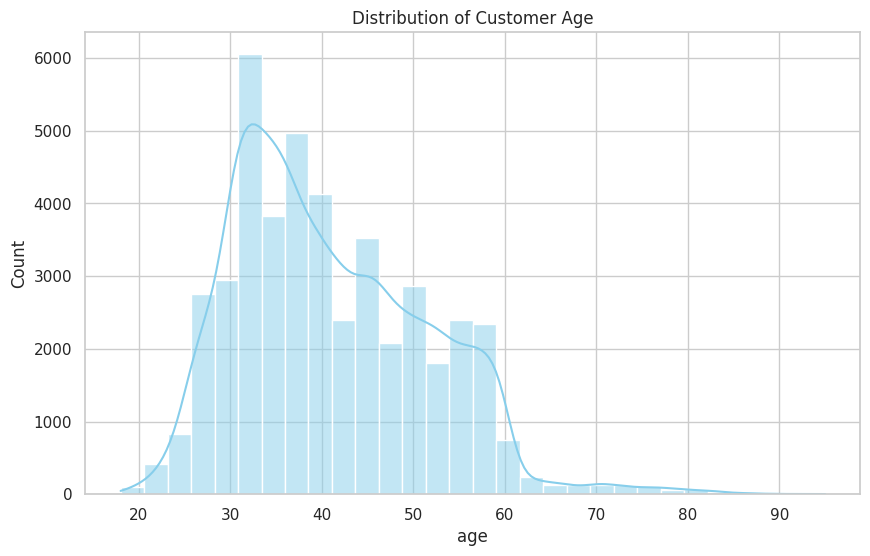

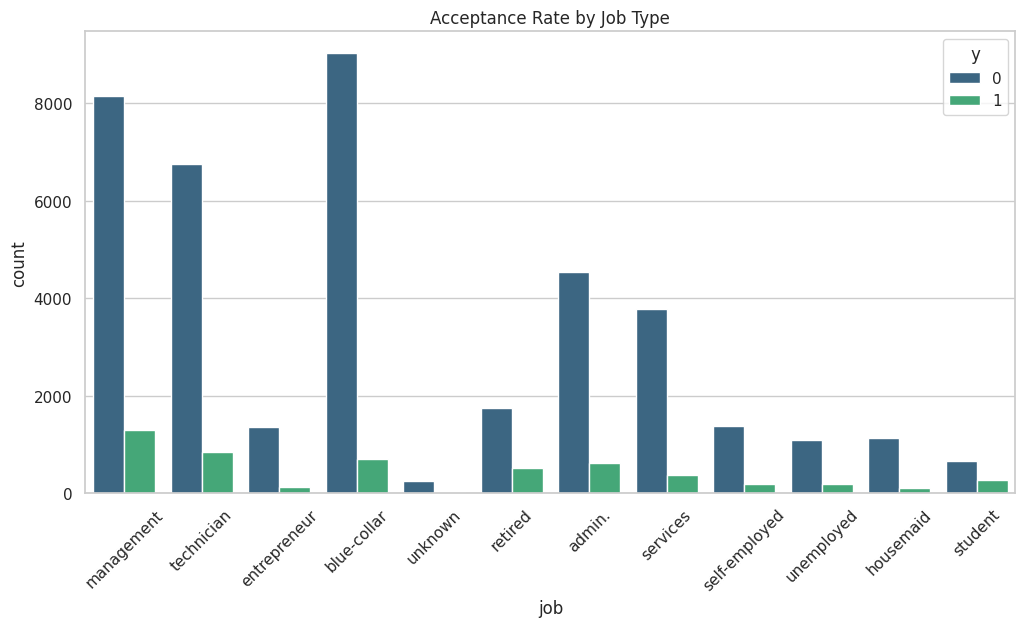

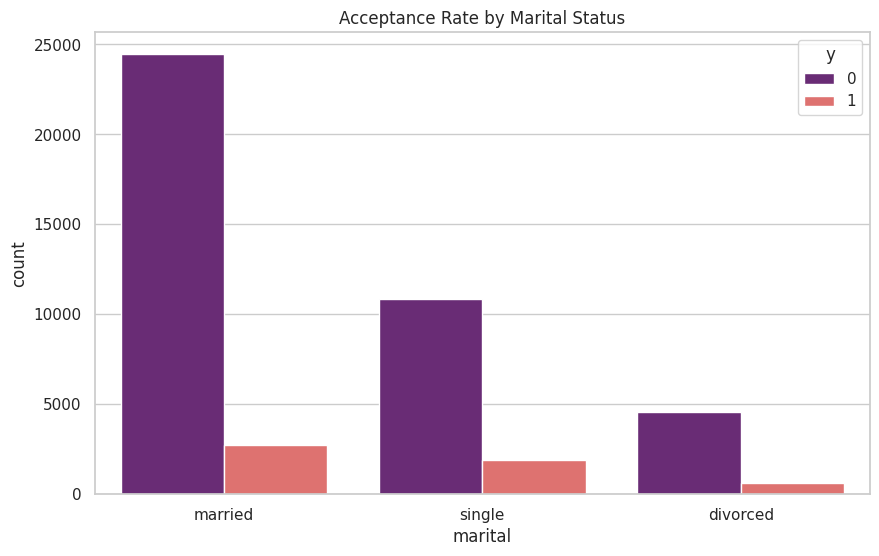

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Age')
plt.show()

# 2. Job vs Acceptance
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='y', palette='viridis')
plt.title('Acceptance Rate by Job Type')
plt.xticks(rotation=45)
plt.show()

# 3. Marital Status vs Acceptance
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital', hue='y', palette='magma')
plt.title('Acceptance Rate by Marital Status')
plt.show()

## 5. Model Training and Testing

For this task, a **Decision Tree Classifier** was used to build the prediction model. Decision Trees are well-suited for this problem due to their high interpretability and their ability to handle both **numerical** and **categorical** data effectively.

The dataset was divided into training and testing sets. The model was trained using the training data and evaluated on the testing data to measure its performance in predicting whether a customer would accept a personal loan offer.


In [18]:
from sklearn.tree import DecisionTreeClassifier

# Split features and target
X = df_prepared.drop('y', axis=1)
y = df_prepared['y']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree
# Using max_depth=5 to prevent overfitting and keep the tree interpretable
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

## 6. Evaluation Metrics

The performance of the classification model was evaluated using multiple metrics to ensure reliable and accurate results. The following evaluation techniques were applied:

- **Accuracy**: Measures the overall correctness of the model by calculating the proportion of correctly predicted instances.
- **Confusion Matrix**: Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.
- **Classification Report**: Summarizes the model’s performance by presenting key metrics such as **precision**, **recall**, and **F1-score** for each class.

These metrics help in understanding both the strengths and limitations of the model in predicting personal loan acceptance.


Overall Model Accuracy: 89.64%


<Figure size 800x600 with 0 Axes>

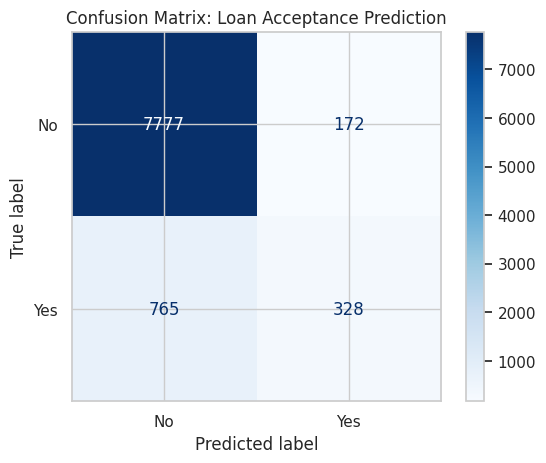


Detailed Classification Report:
              precision    recall  f1-score   support

    Declined       0.91      0.98      0.94      7949
    Accepted       0.66      0.30      0.41      1093

    accuracy                           0.90      9042
   macro avg       0.78      0.64      0.68      9042
weighted avg       0.88      0.90      0.88      9042



In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Accuracy Score
# Measures the percentage of total correct predictions.
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Model Accuracy: {accuracy * 100:.2f}%")

# 2. Confusion Matrix
# Shows exactly where the model is making mistakes:
# - True Negatives (Correctly predicted 'No')
# - False Positives (Predicted 'Yes' but was 'No')
# - False Negatives (Predicted 'No' but was 'Yes')
# - True Positives (Correctly predicted 'Yes')
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: Loan Acceptance Prediction')
plt.show()

# 3. Classification Report
# Provides Precision, Recall, and F1-Score.
# Precision: Accuracy of positive predictions.
# Recall: Ability to find all positive instances.
# F1-Score: Harmonic mean of Precision and Recall.
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Declined', 'Accepted']))

## 7. Conclusion: Summarizing Key Insights

### Summary of Results

#### Model Performance
The Decision Tree classifier achieved an accuracy of approximately **89.64%**. Although the overall accuracy is high, the **recall for the "yes" class** (loan subscription) is comparatively lower due to **class imbalance** in the dataset.

#### Key Predictors
- **duration**: The length of the phone call is the strongest predictor. Longer conversations significantly increase the likelihood of loan acceptance.
- **poutcome_success**: Customers who accepted offers in previous marketing campaigns are highly likely to accept again.
- **age and balance**: These demographic and financial attributes also play a measurable role in predicting loan acceptance.

### Business Insights
- **Targeting Success**: The bank should prioritize customers with a positive previous campaign outcome (**poutcome_success**), as they demonstrate the highest conversion potential.
- **Engagement Quality**: Since call duration is a key influencing factor, training sales representatives to improve customer engagement and extend conversations may increase acceptance rates.
- **Demographic Focus**: Marketing strategies can be better tailored toward specific job categories, such as **students** and **retired individuals**, who often exhibit higher relative acceptance rates despite smaller population sizes.
